In [7]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans

In [8]:
# Cargar datos de vino
wine_data = load_wine()
#X = data.data

X = wine_data.data[ :,:2]
print(X)
y = wine_data.target
print(y)

[[14.23  1.71]
 [13.2   1.78]
 [13.16  2.36]
 [14.37  1.95]
 [13.24  2.59]
 [14.2   1.76]
 [14.39  1.87]
 [14.06  2.15]
 [14.83  1.64]
 [13.86  1.35]
 [14.1   2.16]
 [14.12  1.48]
 [13.75  1.73]
 [14.75  1.73]
 [14.38  1.87]
 [13.63  1.81]
 [14.3   1.92]
 [13.83  1.57]
 [14.19  1.59]
 [13.64  3.1 ]
 [14.06  1.63]
 [12.93  3.8 ]
 [13.71  1.86]
 [12.85  1.6 ]
 [13.5   1.81]
 [13.05  2.05]
 [13.39  1.77]
 [13.3   1.72]
 [13.87  1.9 ]
 [14.02  1.68]
 [13.73  1.5 ]
 [13.58  1.66]
 [13.68  1.83]
 [13.76  1.53]
 [13.51  1.8 ]
 [13.48  1.81]
 [13.28  1.64]
 [13.05  1.65]
 [13.07  1.5 ]
 [14.22  3.99]
 [13.56  1.71]
 [13.41  3.84]
 [13.88  1.89]
 [13.24  3.98]
 [13.05  1.77]
 [14.21  4.04]
 [14.38  3.59]
 [13.9   1.68]
 [14.1   2.02]
 [13.94  1.73]
 [13.05  1.73]
 [13.83  1.65]
 [13.82  1.75]
 [13.77  1.9 ]
 [13.74  1.67]
 [13.56  1.73]
 [14.22  1.7 ]
 [13.29  1.97]
 [13.72  1.43]
 [12.37  0.94]
 [12.33  1.1 ]
 [12.64  1.36]
 [13.67  1.25]
 [12.37  1.13]
 [12.17  1.45]
 [12.37  1.21]
 [13.11  1

In [9]:
# Dataset 1: Datos originales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

# Dataset 2: Datos escalados y normalizados
scaler = StandardScaler()  # Escalado estándar
# scaler = MinMaxScaler()  # Normalización Min-Max
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=24)


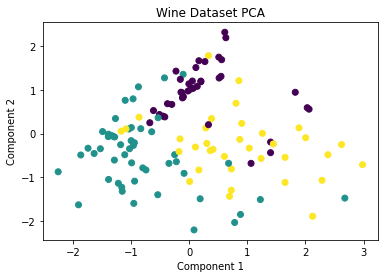

In [10]:
# Utilizamos datos normalizados, reducimos la dimensión del problema
# a 2 utilizando PCA y graficamos el conjunto resultante.

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Wine Dataset PCA")
plt.show()

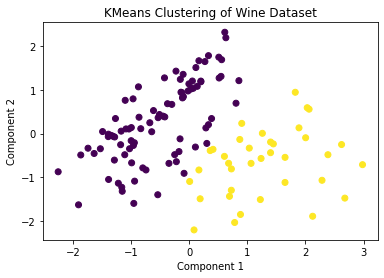

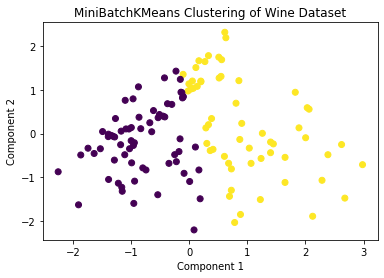

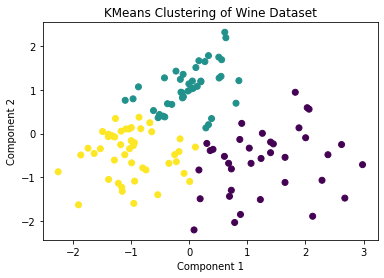

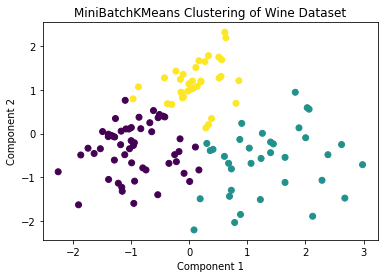

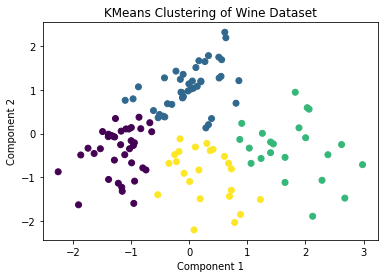

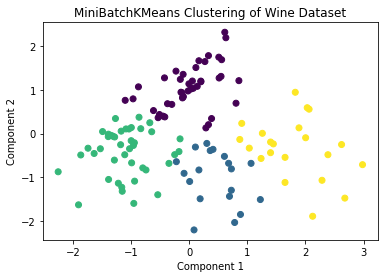

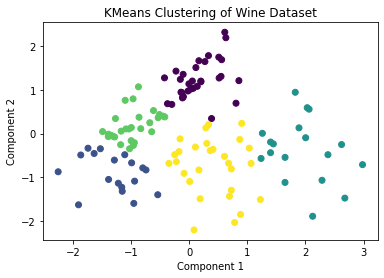

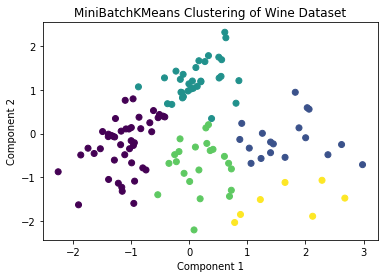

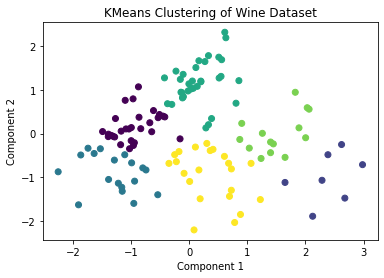

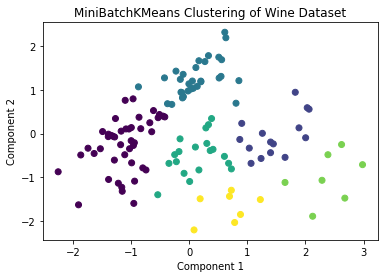

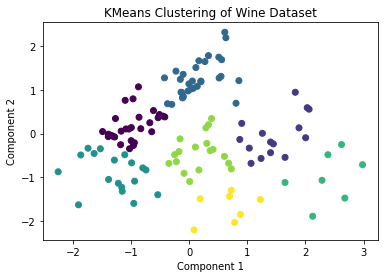

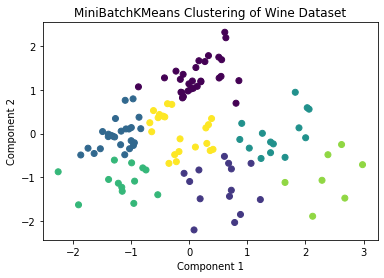

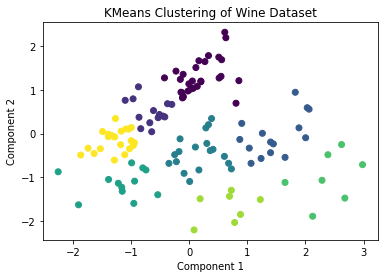

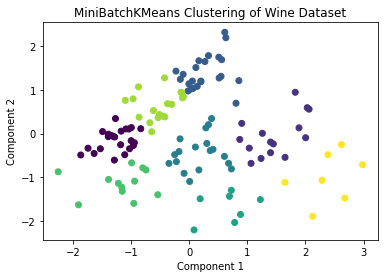

In [12]:
#Graficamos clustering con KMeans y con KMeans MiniBatch
for n_clusters in range (2,9):
        
        kmeans = KMeans(n_clusters, random_state=0)
        kmeans.fit(X_pca)
        kmeans_minibatch = MiniBatchKMeans(n_clusters, random_state=0)
        kmeans_minibatch.fit(X_pca)
        
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
        plt.xlabel("Component 1")
        plt.ylabel("Component 2")
        plt.title("KMeans Clustering of Wine Dataset")
        plt.show()
        
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_minibatch.labels_)
        plt.xlabel("Component 1")
        plt.ylabel("Component 2")
        plt.title("MiniBatchKMeans Clustering of Wine Dataset")
        plt.show()